<a href="https://colab.research.google.com/github/brindhamariappan/brindha_m_zeotap/blob/main/brindha_m_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
customers = pd.read_csv('/content/drive/MyDrive/Dataset/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Dataset/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Dataset/Transactions.csv')

In [3]:
customer_transaction_data = transactions.groupby("CustomerID").agg(
    total_spending=("TotalValue", "sum"),
    transaction_count=("TransactionID", "count"),
).reset_index()

In [4]:
merged_data = customers.merge(customer_transaction_data, on="CustomerID", how="inner")

In [9]:
features = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'ProductID': 'nunique'})


In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['TotalValue', 'ProductID']])

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [12]:
features['Cluster'] = clusters

In [13]:
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 0.8837


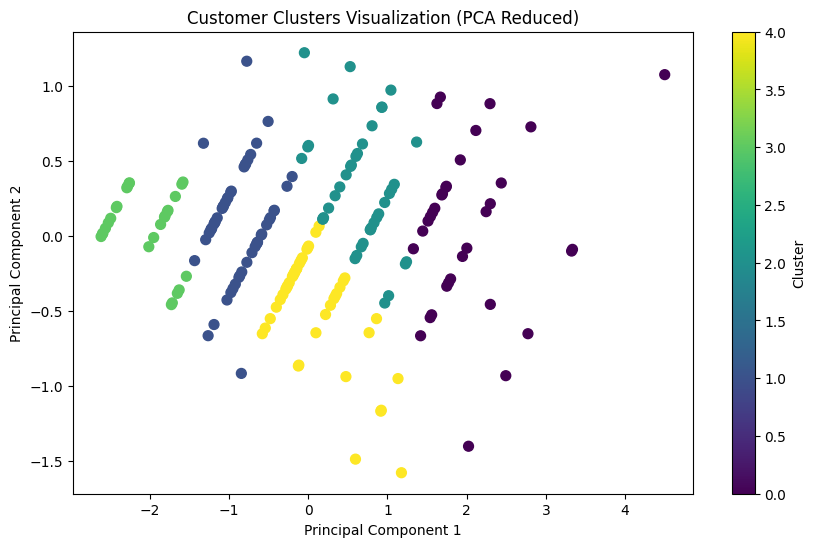

In [14]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Clusters Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
db_index = davies_bouldin_score(features, clusters)


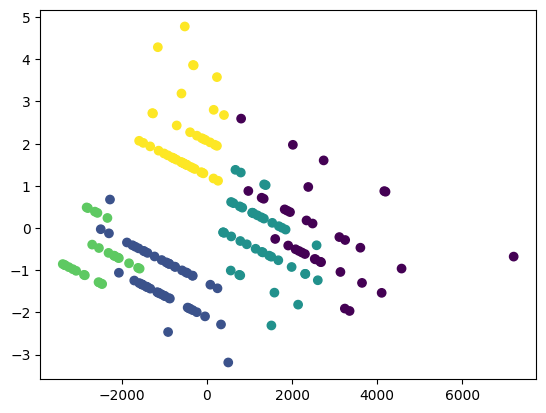

In [16]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters)
plt.show()

In [27]:
cluster_range = range(2, 11)
db_index_values = []
silhouette_scores = []
db_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

In [20]:
db_index = davies_bouldin_score(scaled_features, cluster_labels)
silhouette_avg = silhouette_score(scaled_features, cluster_labels)

db_index_values.append(db_index)
silhouette_scores.append(silhouette_avg)

evaluate clusters


In [28]:
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

    db_score = davies_bouldin_score(scaled_features, cluster_labels)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)

    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

In [29]:
optimal_clusters = cluster_range[db_scores.index(min(db_scores))]
print(f"Optimal Number of Clusters: {optimal_clusters}")


kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
final_clusters = kmeans_optimal.fit_predict(scaled_features)
features['Cluster'] = final_clusters


final_db_index = davies_bouldin_score(scaled_features, final_clusters)
final_silhouette_score = silhouette_score(scaled_features, final_clusters)
print(f"Davies-Bouldin Index for Optimal Clusters: {final_db_index:.4f}")
print(f"Silhouette Score for Optimal Clusters: {final_silhouette_score:.4f}")

Optimal Number of Clusters: 2
Davies-Bouldin Index for Optimal Clusters: 0.7420
Silhouette Score for Optimal Clusters: 0.4829


In [30]:
features.to_csv("Clustered_Customers.csv", index=False)

Plot Davies-Bouldin Index and Silhouette Score

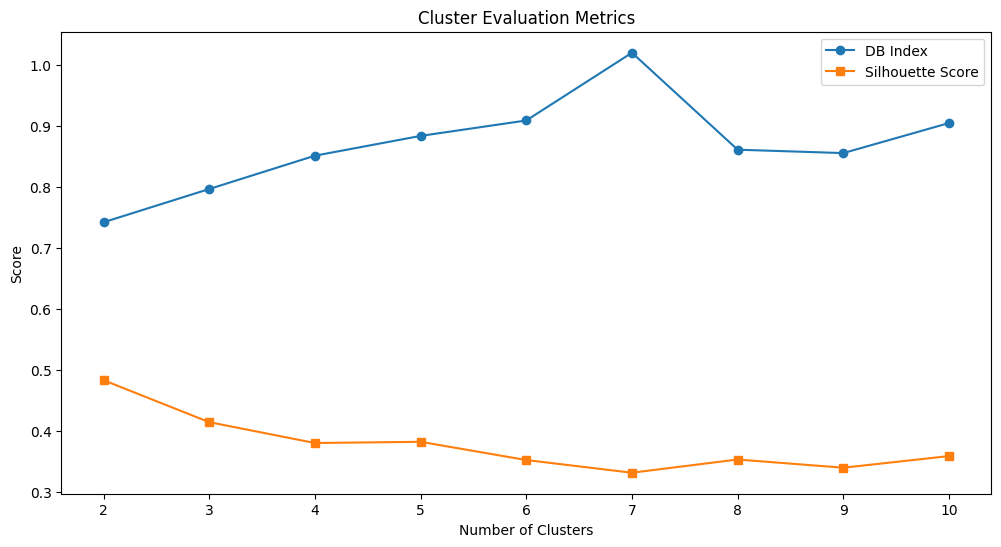

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, db_scores, marker='o', label='DB Index')
plt.plot(cluster_range, silhouette_scores, marker='s', label='Silhouette Score')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Cluster Evaluation Metrics")
plt.legend()
plt.show()

Visualize clusters with PCA


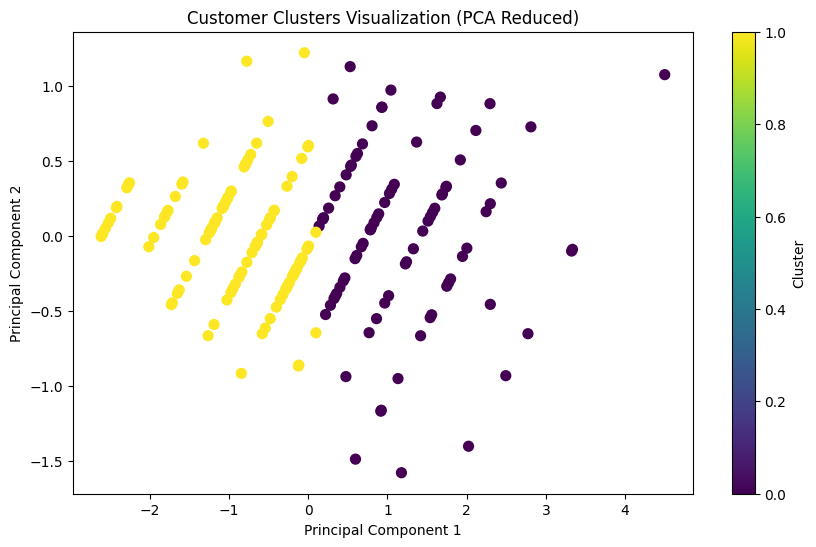

In [32]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=final_clusters, cmap='viridis', s=50)
plt.title('Customer Clusters Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
